# Quick script to inspect ```data.json```

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import json

In [5]:
with open("data.json") as f:
    df = pd.DataFrame(json.load(f))
df.head()[:1]

,module_id,device_id,start_time,end_time,wall_time,memory,runtime,channel_in,channel_out,channel_in_total,channel_out_total
0,23c3aac7-116a-4ec7-8593-9d3decb6e647,7dd5428c-3351-4de3-86c6-2f5a20df458f,1.640125e+18,1.640125e+18,69464939,1249352,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0


data.json: len=175


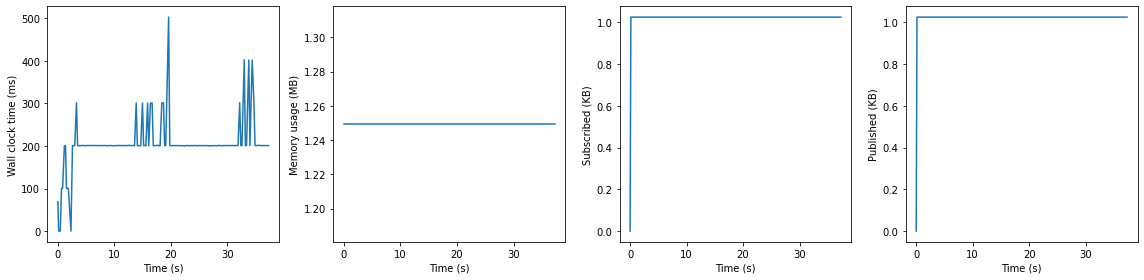

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

x = (df["end_time"] - df["end_time"][0]) / 10**9
plots = {
    "wall_time": (6, "Wall clock time (ms)"),
    "memory": (6, "Memory usage (MB)"),
    "channel_in_total": (3, "Subscribed (KB)"),
    "channel_out_total": (3, "Published (KB)")
}

for ax, (k, (scale, desc)) in zip(axs, plots.items()):
    ax.plot(x, df[k] / 10**scale)
    ax.set_ylabel(desc)
    ax.set_xlabel("Time (s)")

fig.tight_layout()
print("data.json: len={}".format(len(df)))